# Domácí úkol 01

In [516]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.colors as colors
from matplotlib.patches import Patch

## Předzpracování dat

In [517]:
intakes = pd.read_csv("intakes.csv")
outcomes = pd.read_csv("outcomes.csv")

In [518]:
display(intakes.info())
outcomes.info()
print("Intakes:")
display(intakes.head())
print("Out")
display(outcomes.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167556 entries, 0 to 167555
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Animal ID         167556 non-null  object
 1   Name              119338 non-null  object
 2   DateTime          167556 non-null  object
 3   MonthYear         167556 non-null  object
 4   Found Location    167556 non-null  object
 5   Intake Type       167556 non-null  object
 6   Intake Condition  167556 non-null  object
 7   Animal Type       167556 non-null  object
 8   Sex upon Intake   167554 non-null  object
 9   Age upon Intake   167555 non-null  object
 10  Breed             167556 non-null  object
 11  Color             167556 non-null  object
dtypes: object(12)
memory usage: 15.3+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167559 entries, 0 to 167558
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Animal ID         167559 non-null  object
 1   Name              119476 non-null  object
 2   DateTime          167559 non-null  object
 3   MonthYear         167559 non-null  object
 4   Date of Birth     167559 non-null  object
 5   Outcome Type      167515 non-null  object
 6   Outcome Subtype   76968 non-null   object
 7   Animal Type       167559 non-null  object
 8   Sex upon Outcome  167556 non-null  object
 9   Age upon Outcome  167512 non-null  object
 10  Breed             167559 non-null  object
 11  Color             167559 non-null  object
dtypes: object(12)
memory usage: 15.3+ MB
Intakes:


,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
0,A786884,*Brock,01/03/2019 04:19:00 PM,January 2019,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,2 years,Beagle Mix,Tricolor
1,A706918,Belle,07/05/2015 12:59:00 PM,July 2015,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Dog,Spayed Female,8 years,English Springer Spaniel,White/Liver
2,A724273,Runster,04/14/2016 06:43:00 PM,April 2016,2818 Palomino Trail in Austin (TX),Stray,Normal,Dog,Intact Male,11 months,Basenji Mix,Sable/White
3,A665644,NaN,10/21/2013 07:59:00 AM,October 2013,Austin (TX),Stray,Sick,Cat,Intact Female,4 weeks,Domestic Shorthair Mix,Calico
4,A857105,Johnny Ringo,05/12/2022 12:23:00 AM,May 2022,4404 Sarasota Drive in Austin (TX),Public Assist,Normal,Cat,Neutered Male,2 years,Domestic Shorthair,Orange Tabby


Out


,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
0,A882831,*Hamilton,07/01/2023 06:12:00 PM,Jul 2023,03/25/2023,Adoption,NaN,Cat,Neutered Male,3 months,Domestic Shorthair Mix,Black/White
1,A794011,Chunk,05/08/2019 06:20:00 PM,May 2019,05/02/2017,Rto-Adopt,NaN,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White
2,A776359,Gizmo,07/18/2018 04:02:00 PM,Jul 2018,07/12/2017,Adoption,NaN,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown
3,A821648,NaN,08/16/2020 11:38:00 AM,Aug 2020,08/16/2019,Euthanasia,NaN,Other,Unknown,1 year,Raccoon,Gray
4,A720371,Moose,02/13/2016 05:59:00 PM,Feb 2016,10/08/2015,Adoption,NaN,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff


V obou datasetech máme 12 příznáků, které jsou typu object (bude potřeba opravit).

**Intakes**

- Animal ID
  - unikátní identifikátor zvířete
- Name
  - jméno zvířete
- DataTime
  - čas a datum příchodu zvířete do útulku
- MonthYear
  - rok a měsíc příchodu zvířete do útulku
- Found Location
  - Místo nalezení
- Intake Type
  - typ přijetí např. darem, zatoulané atd.
- Intake Condition
  - Stav zvířete při přijetí
- Animal Type
  - typ zvířete např. pes, kočka, dobytek atd.
- Sex upon Intake
  - pohlaví zvířete, a jestli probhěla kastrace
- Age upon Intake
  - věk při přijetí
- Breed
- Color

**Outcomes**
- Animal ID
  - unikátní identifikátor zvířete
- Name
  - jméno zvířete
- DataTime
  - čas a datum příchodu zvířete do útulku
- MonthYear
  - rok a měsíc příchodu zvířete do útulku
- Date of Birth
- Outcome Type
  - typ odchodu např. adopce, návrat majiteli, přesun jinam, eutanázie atd.
- Outcome Subtype

- Animal Type
  - typ zvířete např. pes, kočka, dobytek atd.
- Sex upon Outcome
  - pohlaví zvířete, a jestli probhěla kastrace
- Breed
- Color

### Intakes
Nejprve se zaměřím na tabulku `intakes`.
Jako první zkusím zjistit jak jsou reprezentovány nedefinované hodnoty v tabulce.
Začnu kategorickými daty

- Intake Type
- Intake Condition
- Animal Type
- Sex upon Intake
- Breed
- Color

In [519]:
def printUniqueValInCols(categorical_features, df):
    print("Counts of unique values for each feature:")
    for feature in categorical_features:
        print(f"{feature}: {df[feature].nunique(dropna=False)}")
        print(f"{df[feature].unique()}\n")

In [520]:
categorical_features = [
    "Intake Type",
    "Intake Condition",
    "Animal Type",
    "Sex upon Intake",
    "Breed",
    "Color",
]
printUniqueValInCols(categorical_features, intakes)

Counts of unique values for each feature:
Intake Type: 6
['Stray' 'Public Assist' 'Owner Surrender' 'Abandoned' 'Wildlife'
 'Euthanasia Request']

Intake Condition: 20
['Normal' 'Sick' 'Injured' 'Pregnant' 'Neonatal' 'Nursing' 'Aged'
 'Unknown' 'Med Attn' 'Medical' 'Other' 'Feral' 'Behavior' 'Med Urgent'
 'Parvo' 'Space' 'Agonal' 'Neurologic' 'Panleuk' 'Congenital']

Animal Type: 5
['Dog' 'Cat' 'Other' 'Bird' 'Livestock']

Sex upon Intake: 6
['Neutered Male' 'Spayed Female' 'Intact Male' 'Intact Female' 'Unknown'
 nan]

Breed: 2966
['Beagle Mix' 'English Springer Spaniel' 'Basenji Mix' ... 'Tosa'
 'Toy Poodle/Standard Schnauzer' 'Brittany/Australian Shepherd']

Color: 650
['Tricolor' 'White/Liver' 'Sable/White' 'Calico' 'Orange Tabby' 'Tan/Gray'
 'Chocolate' 'Black' 'Brown Tabby' 'Black/White' 'Cream Tabby' 'White/Tan'
 'Brown/White' 'Brown Tabby/White' 'Brown Brindle/White' 'Torbie'
 'Tan/White' 'Tortie' 'Blue/White' 'White/Brown' 'Brown/Cream' 'Brown'
 'White/Black' 'Blue' 'White' 'B

V tabulce intakes jsou chybějící hodnoty kategorických příznaků označeny jako Unknown.

V příznaku Sex upon Intake se vyskytuje jak hodnota Unknown tak i hodnota NaN.

Abychom zachovali konzistenci v tabulce, převedu všechny hodnoty Unknown v Sex upon Intake na hodnotu NaN => chybějící hodnota. 

Převedu stejným způsobem i v ostatních kategorických příznacích

In [521]:
for feature in categorical_features:
    print(f"{feature}: {(intakes[feature] == 'Unknown').sum()}")

Intake Type: 0
Intake Condition: 25
Animal Type: 0
Sex upon Intake: 13036
Breed: 3
Color: 1


In [522]:
def replaceUnknown(columns, df):
    for col in columns:
        df[col].replace("Unknown", np.NAN, inplace=True)

In [523]:
intakes_cleaned = (
    intakes.copy()
)  # poridim si kopii, abych mel vzdycky k dispozici, orginal/zdroj

replaceUnknown(categorical_features, intakes_cleaned)

for feature in categorical_features:
    print(f"{feature}: {(intakes_cleaned[feature] == 'Unknown').sum()}")

Intake Type: 0
Intake Condition: 0
Animal Type: 0
Sex upon Intake: 0
Breed: 0
Color: 0


In [524]:
intakes_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167556 entries, 0 to 167555
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Animal ID         167556 non-null  object
 1   Name              119338 non-null  object
 2   DateTime          167556 non-null  object
 3   MonthYear         167556 non-null  object
 4   Found Location    167556 non-null  object
 5   Intake Type       167556 non-null  object
 6   Intake Condition  167531 non-null  object
 7   Animal Type       167556 non-null  object
 8   Sex upon Intake   154518 non-null  object
 9   Age upon Intake   167555 non-null  object
 10  Breed             167553 non-null  object
 11  Color             167555 non-null  object
dtypes: object(12)
memory usage: 15.3+ MB


In [525]:
intakes_cleaned[categorical_features] = intakes_cleaned[categorical_features].astype(
    "category"
)
intakes_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167556 entries, 0 to 167555
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   Animal ID         167556 non-null  object  
 1   Name              119338 non-null  object  
 2   DateTime          167556 non-null  object  
 3   MonthYear         167556 non-null  object  
 4   Found Location    167556 non-null  object  
 5   Intake Type       167556 non-null  category
 6   Intake Condition  167531 non-null  category
 7   Animal Type       167556 non-null  category
 8   Sex upon Intake   154518 non-null  category
 9   Age upon Intake   167555 non-null  object  
 10  Breed             167553 non-null  category
 11  Color             167555 non-null  category
dtypes: category(6), object(6)
memory usage: 9.1+ MB


**Ošetření číselných a datových příznaků**

In [526]:
print(intakes["Age upon Intake"].unique())

['2 years' '8 years' '11 months' '4 weeks' '4 years' '6 years' '6 months'
 '5 months' '1 month' '14 years' '2 weeks' '1 week' '2 months' '18 years'
 '9 years' '4 months' '1 day' '1 year' '3 years' '4 days' '5 years'
 '15 years' '8 months' '6 days' '7 years' '3 months' '3 weeks' '12 years'
 '9 months' '10 years' '10 months' '7 months' '0 years' '1 weeks' '5 days'
 '17 years' '2 days' '11 years' '3 days' '13 years' '5 weeks' '16 years'
 '19 years' '20 years' '-1 years' '-3 years' '22 years' '-4 years'
 '28 years' nan '23 years' '30 years' '-2 years' '21 years' '25 years'
 '24 years']


Z hodnot vidím, že mezi věky se vyskytují i záporná čísla, ty budu pohlížet jako nedefinované tj. chybějící hodnoty.

In [527]:
def toDays(ageStr):
    if pd.isna(ageStr):
        return np.NAN
    value, unit = ageStr.split()
    value = int(value)
    if value < 0:
        return np.NAN

    if "year" in unit:
        return value * 365
    elif "month" in unit:
        return value * 30
    elif "week" in unit:
        return value * 7
    elif "day" in unit:
        return value
    else:
        return np.NAN

In [528]:
intakes_cleaned["Age upon Intake"] = intakes_cleaned["Age upon Intake"].apply(toDays)
print(intakes_cleaned["Age upon Intake"])

0          730.0
1         2920.0
2          330.0
3           28.0
4          730.0
           ...  
167551     730.0
167552    1095.0
167553     730.0
167554    1825.0
167555    1095.0
Name: Age upon Intake, Length: 167556, dtype: float64


In [529]:
intakes_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167556 entries, 0 to 167555
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   Animal ID         167556 non-null  object  
 1   Name              119338 non-null  object  
 2   DateTime          167556 non-null  object  
 3   MonthYear         167556 non-null  object  
 4   Found Location    167556 non-null  object  
 5   Intake Type       167556 non-null  category
 6   Intake Condition  167531 non-null  category
 7   Animal Type       167556 non-null  category
 8   Sex upon Intake   154518 non-null  category
 9   Age upon Intake   167546 non-null  float64 
 10  Breed             167553 non-null  category
 11  Color             167555 non-null  category
dtypes: category(6), float64(1), object(5)
memory usage: 9.1+ MB


**Převedení typu příznaku DateTime na datetime64**

In [530]:
intakes_cleaned["DateTime"] = pd.to_datetime(intakes["DateTime"])
intakes_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167556 entries, 0 to 167555
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Animal ID         167556 non-null  object        
 1   Name              119338 non-null  object        
 2   DateTime          167556 non-null  datetime64[ns]
 3   MonthYear         167556 non-null  object        
 4   Found Location    167556 non-null  object        
 5   Intake Type       167556 non-null  category      
 6   Intake Condition  167531 non-null  category      
 7   Animal Type       167556 non-null  category      
 8   Sex upon Intake   154518 non-null  category      
 9   Age upon Intake   167546 non-null  float64       
 10  Breed             167553 non-null  category      
 11  Color             167555 non-null  category      
dtypes: category(6), datetime64[ns](1), float64(1), object(4)
memory usage: 9.1+ MB


**Další úpravy**

Smažu sloupec MonthYear, redundantní data. Název měsíce a rok přijmu do útulku je obsažen ve sloupci DateTime. 

Poté odstraním duplicitní záznamy.

In [531]:
intakes_cleaned = intakes_cleaned.drop("MonthYear", axis=1)
intakes_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167556 entries, 0 to 167555
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Animal ID         167556 non-null  object        
 1   Name              119338 non-null  object        
 2   DateTime          167556 non-null  datetime64[ns]
 3   Found Location    167556 non-null  object        
 4   Intake Type       167556 non-null  category      
 5   Intake Condition  167531 non-null  category      
 6   Animal Type       167556 non-null  category      
 7   Sex upon Intake   154518 non-null  category      
 8   Age upon Intake   167546 non-null  float64       
 9   Breed             167553 non-null  category      
 10  Color             167555 non-null  category      
dtypes: category(6), datetime64[ns](1), float64(1), object(3)
memory usage: 7.8+ MB


Před tím než odstraním duplicitní záznamy se zjistit jak jsou rozložené v datasetu. To udělám tak, že si vyfiltruji všechny řádky, které jsou duplcitní a potom je seskupím stejné řádky k sobě. Indexy řádků v každé skupině si uložím do pole. Každý prvek pole obsahuje seznam indexů řádků, které jsou shodné. Protože jich není mnoho, tak si je vypíšu.

In [532]:
def printDupGroups(df):
    duplicate_groups = (
        df[df.duplicated(keep=False)]
        .groupby(list(df.columns))
        .apply(lambda x: x.index.tolist())
    )
    duplicate_groups_array = duplicate_groups.tolist()
    print(f"number of unique duplicite rows: {len(duplicate_groups_array)}")
    print("all groups of duplcite rows:")
    for group in duplicate_groups_array:
        print(f"{group[:]} l: {len(group)}")

In [533]:
printDupGroups(intakes_cleaned)

number of unique duplicite rows: 27
all groups of duplcite rows:
[18764, 18765] l: 2
[78517, 78518] l: 2
[85541, 85542] l: 2
[8331, 8332] l: 2
[10871, 10872] l: 2
[62161, 62162] l: 2
[91869, 91870] l: 2
[74574, 74575] l: 2
[32013, 32014] l: 2
[138965, 138966] l: 2
[162411, 162412] l: 2
[89696, 89697] l: 2
[76379, 76380] l: 2
[53196, 53197] l: 2
[101249, 101250] l: 2
[4329, 4330] l: 2
[90818, 90819] l: 2
[104960, 104961] l: 2
[37813, 37814] l: 2
[158515, 158516] l: 2
[112106, 112107] l: 2
[15656, 15657] l: 2
[13363, 13364] l: 2
[98785, 98786] l: 2
[61397, 61398] l: 2
[22189, 22190] l: 2
[167210, 167211] l: 2


Vidím, že duplictní jsou vždy dvojice, po sobě následujících řádků. To vypadá, že by se mohlo jednat o chybu, proto je odstraním. 

In [534]:
intakes_cleaned = intakes_cleaned.drop_duplicates()

Jako poslední část vizualizuji distribuci chybějících dat v Intakes.

In [535]:
def missingValuesGraph(df, name):
    fig, ax = plt.subplots(figsize=(14, 6))
    cmap = colors.ListedColormap(["darkslategrey", "white"])
    ax.imshow(
        df.isna(),
        aspect="auto",
        cmap=cmap,
        interpolation="none",
        vmin=0,
        vmax=1,
    )
    ax.set_xlabel("Columns")
    ax.set_ylabel("Rows")

    num_columns = len(df.columns)

    ax.set_xticks(np.arange(num_columns))
    ax.tick_params(axis="x", which="major", length=0)
    ax.set_xticklabels(df.columns, rotation=45, ha="right")

    # minor ticks for the lines to split the collumns
    ax.set_xticks(np.arange(0.5, num_columns + 0.5, 1), minor=True)

    legend_elements = [
        Patch(facecolor="darkslategrey", edgecolor="black", label="Present Value"),
        Patch(facecolor="white", edgecolor="black", label="Missing Value"),
    ]

    ax.legend(
        handles=legend_elements,
        loc="upper right",
        bbox_to_anchor=(1.05, -0.1),
        borderaxespad=0.0,
    )

    ax.grid(
        which="minor",
        visible=True,
        axis="x",
        color="white",
        linestyle="-",
        linewidth=1.0,
    )

    ax.set_yticks(range(0, len(df), max(1, len(df) // 5)))
    ax.set_title(f"Missing Values in {name}")

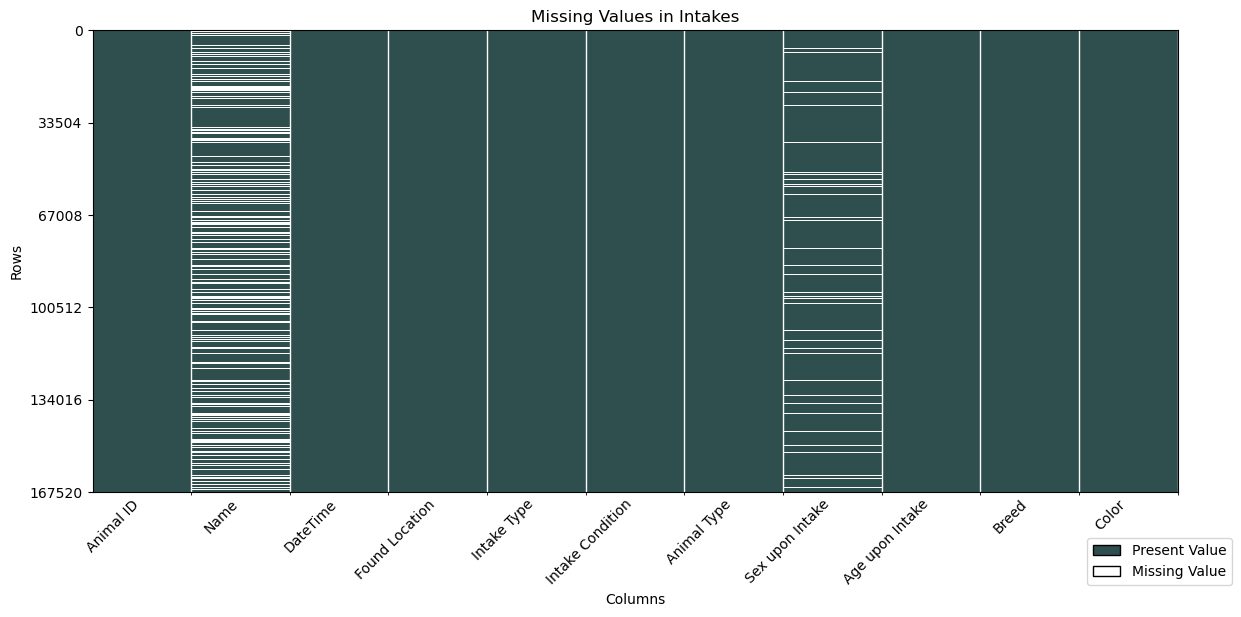

In [536]:
missingValuesGraph(intakes_cleaned, "Intakes")

### Outcomes

Nyní předzpracuji data v tabulce outcomes. Provedu podobné kroky jako při zpracování intakes.


- Animal ID
  - unikátní identifikátor zvířete
- Name
  - jméno zvířete
- DataTime
  - čas a datum příchodu zvířete do útulku
- MonthYear
  - rok a měsíc příchodu zvířete do útulku
- Date of Birth
- Outcome Type
  - typ odchodu např. adopce, návrat majiteli, přesun jinam, eutanázie atd.
- Outcome Subtype

- Animal Type
  - typ zvířete např. pes, kočka, dobytek atd.
- Sex upon Outcome
  - pohlaví zvířete, a jestli probhěla kastrace
- Breed
- Color

In [537]:
outcomes.head()

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
0,A882831,*Hamilton,07/01/2023 06:12:00 PM,Jul 2023,03/25/2023,Adoption,NaN,Cat,Neutered Male,3 months,Domestic Shorthair Mix,Black/White
1,A794011,Chunk,05/08/2019 06:20:00 PM,May 2019,05/02/2017,Rto-Adopt,NaN,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White
2,A776359,Gizmo,07/18/2018 04:02:00 PM,Jul 2018,07/12/2017,Adoption,NaN,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown
3,A821648,NaN,08/16/2020 11:38:00 AM,Aug 2020,08/16/2019,Euthanasia,NaN,Other,Unknown,1 year,Raccoon,Gray
4,A720371,Moose,02/13/2016 05:59:00 PM,Feb 2016,10/08/2015,Adoption,NaN,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff


In [538]:
categorical_features = [
    "Outcome Type",
    "Outcome Subtype",
    "Animal Type",
    "Sex upon Outcome",
    "Breed",
    "Color",
]
printUniqueValInCols(categorical_features, outcomes)

Counts of unique values for each feature:
Outcome Type: 12
['Adoption' 'Rto-Adopt' 'Euthanasia' 'Transfer' 'Return to Owner' 'Died'
 'Disposal' 'Missing' nan 'Relocate' 'Stolen' 'Lost']

Outcome Subtype: 27
[nan 'Partner' 'Foster' 'Snr' 'SCRP' 'Out State' 'Suffering' 'At Vet'
 'Underage' 'Rabies Risk' 'In Kennel' 'Offsite' 'Aggressive' 'Field'
 'Emergency' 'Enroute' 'In Foster' 'Behavior' 'Medical'
 'Court/Investigation' 'Possible Theft' 'Barn' 'Customer S' 'In State'
 'Emer' 'In Surgery' 'Prc']

Animal Type: 5
['Cat' 'Dog' 'Other' 'Bird' 'Livestock']

Sex upon Outcome: 6
['Neutered Male' 'Unknown' 'Intact Male' 'Spayed Female' 'Intact Female'
 nan]

Breed: 2964
['Domestic Shorthair Mix' 'Chihuahua Shorthair Mix' 'Raccoon' ...
 'Lhasa Apso/Standard Poodle' 'Dachshund Wirehair/Bruss Griffon'
 'Miniature Schnauzer/Beagle']

Color: 653
['Black/White' 'Brown Tabby/White' 'White/Brown' 'Gray' 'Buff'
 'Orange Tabby' 'Brown' 'Blue Tabby' 'Brown Tabby' 'Black'
 'White/Orange Tabby' 'Blue/White

In [539]:
print("nan counts: ")
for feature in categorical_features:
    print(f"{feature}: {(outcomes[feature].isna()).sum()}")

print("\nUnknown counts: ")
for feature in categorical_features:
    print(f"{feature}: {(outcomes[feature] == 'Unknown').sum()}")

nan counts: 
Outcome Type: 44
Outcome Subtype: 90591
Animal Type: 0
Sex upon Outcome: 3
Breed: 0
Color: 0

Unknown counts: 
Outcome Type: 0
Outcome Subtype: 0
Animal Type: 0
Sex upon Outcome: 13001
Breed: 3
Color: 1


Podobně jako v intakes, Sex upon Outcome obsahuje jak hodnoty "Unknown", tak i hodnoty nan, Breed a Color také obsahují Unknown. Převedu tedy, všechny výskyty Unknown v těchto sloupcích na NaN. 

In [540]:
outcomes_cleaned = outcomes.copy()
replaceUnknown(categorical_features, outcomes_cleaned)

In [541]:
print("nan counts: ")
for feature in categorical_features:
    print(f"{feature}: {(outcomes_cleaned[feature].isna()).sum()}")

print("\nUnknown counts: ")
for feature in categorical_features:
    print(f"{feature}: {(outcomes_cleaned[feature] == 'Unknown').sum()}")

nan counts: 
Outcome Type: 44
Outcome Subtype: 90591
Animal Type: 0
Sex upon Outcome: 13004
Breed: 3
Color: 1

Unknown counts: 
Outcome Type: 0
Outcome Subtype: 0
Animal Type: 0
Sex upon Outcome: 0
Breed: 0
Color: 0


In [542]:
outcomes_cleaned[categorical_features] = outcomes_cleaned[categorical_features].astype(
    "category"
)
outcomes_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167559 entries, 0 to 167558
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   Animal ID         167559 non-null  object  
 1   Name              119476 non-null  object  
 2   DateTime          167559 non-null  object  
 3   MonthYear         167559 non-null  object  
 4   Date of Birth     167559 non-null  object  
 5   Outcome Type      167515 non-null  category
 6   Outcome Subtype   76968 non-null   category
 7   Animal Type       167559 non-null  category
 8   Sex upon Outcome  154555 non-null  category
 9   Age upon Outcome  167512 non-null  object  
 10  Breed             167556 non-null  category
 11  Color             167558 non-null  category
dtypes: category(6), object(6)
memory usage: 9.1+ MB


In [543]:
outcomes_cleaned["Age upon Outcome"].unique()

array(['3 months', '2 years', '1 year', '4 months', '6 days', '7 years',
       '2 months', '3 years', '2 days', '3 weeks', '11 years', '9 months',
       '4 weeks', '2 weeks', '6 months', '9 years', '10 years', '1 month',
       '8 years', '7 months', '6 years', '4 years', '12 years', '5 years',
       '1 day', '1 weeks', '5 months', '5 days', '15 years', '10 months',
       '4 days', '16 years', '8 months', nan, '13 years', '1 week',
       '14 years', '11 months', '3 days', '0 years', '5 weeks',
       '17 years', '18 years', '20 years', '22 years', '-2 years',
       '19 years', '28 years', '-3 years', '23 years', '25 years',
       '30 years', '-1 years', '24 years', '21 years', '-4 years'],
      dtype=object)

Stejný problém jako v intakes. Vyřeším analogicky.

In [544]:
outcomes_cleaned["Age upon Outcome"] = outcomes_cleaned["Age upon Outcome"].apply(
    toDays
)
print(outcomes_cleaned["Age upon Outcome"])

0           90.0
1          730.0
2          365.0
3          365.0
4          120.0
           ...  
167554     730.0
167555     730.0
167556     730.0
167557    3650.0
167558     730.0
Name: Age upon Outcome, Length: 167559, dtype: float64


**Převedení příznaku DateTime na typ datetime64**

In [545]:
outcomes_cleaned["DateTime"] = pd.to_datetime(outcomes["DateTime"])

**Další úpravy**

Smažu sloupec MonthYear, redundantní data. Název měsíce a rok odchodu z útulku je obsažen ve sloupci DateTime. 

Poté odstraním duplicitní záznamy.

In [546]:
outcomes_cleaned = outcomes_cleaned.drop("MonthYear", axis=1)
outcomes_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167559 entries, 0 to 167558
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Animal ID         167559 non-null  object        
 1   Name              119476 non-null  object        
 2   DateTime          167559 non-null  datetime64[ns]
 3   Date of Birth     167559 non-null  object        
 4   Outcome Type      167515 non-null  category      
 5   Outcome Subtype   76968 non-null   category      
 6   Animal Type       167559 non-null  category      
 7   Sex upon Outcome  154555 non-null  category      
 8   Age upon Outcome  167503 non-null  float64       
 9   Breed             167556 non-null  category      
 10  Color             167558 non-null  category      
dtypes: category(6), datetime64[ns](1), float64(1), object(3)
memory usage: 7.8+ MB


In [547]:
printDupGroups(outcomes_cleaned)

number of unique duplicite rows: 7
all groups of duplcite rows:
[164509, 164510] l: 2
[133620, 133621] l: 2
[160673, 160674] l: 2
[140929, 140930] l: 2
[6540, 6541] l: 2
[44936, 44937] l: 2
[35084, 35085] l: 2


Podobná situace jako u intakes. Pravděpodobně chyby => odstraním duplcity.

In [548]:
outcomes_cleaned = outcomes_cleaned.drop_duplicates()

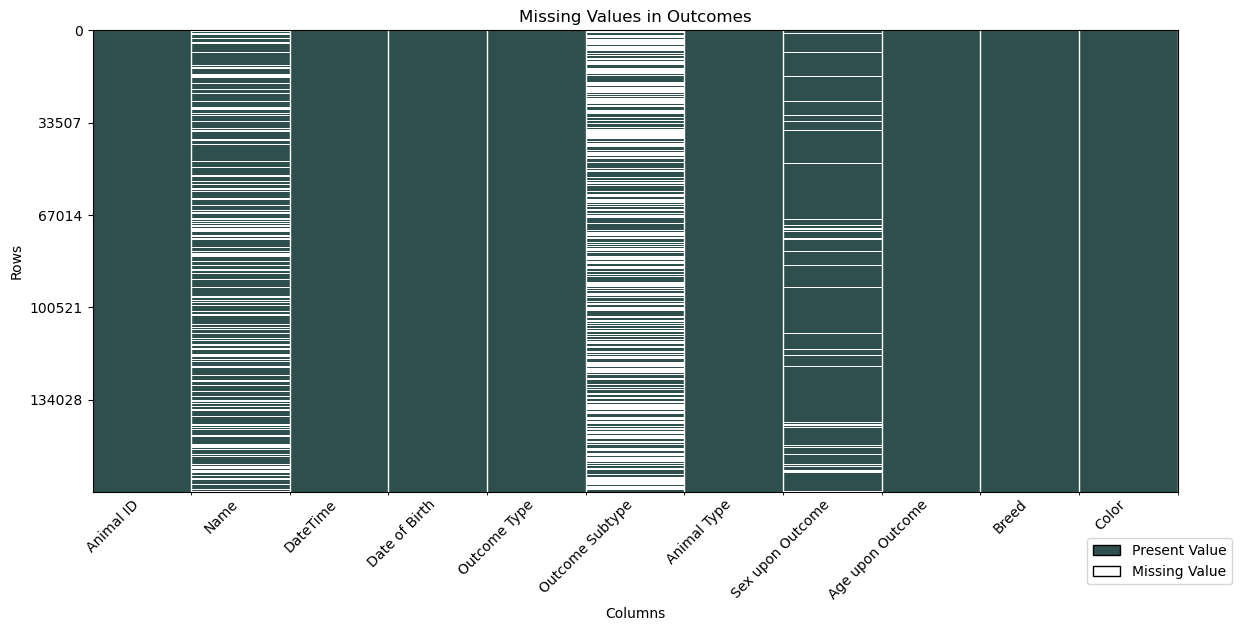

In [549]:
missingValuesGraph(outcomes_cleaned, "Outcomes")  # chybejici hodnoty v outcomes

Můžeme si všimnout, že příznak Outcome Subtype obsahuje hodně chybějících dat. Stojí za zvážení, jestli ho celý nezrušit.

## Deskriptivní statistiky

//TODO